In [2]:
#import library os untuk membaca drive pada server google collab
import os
#import library tensorflow sebagai library utama pemrosesan
import tensorflow as tf
#import library ImageDataGenerator untuk melakukan praprocessing citra dan augmentasi
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
#install library split-folder untuk membagi citra menjadi beberapa bagian nantinya
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# melakukan ekstraksi pada file zip yang diperoleh dari kaggle
import zipfile,os
# karena file terletak pada google drive maka melakukan mounting drive lalu mencari lokasi file
local_zip = '/content/drive/MyDrive/Comvis/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
# lokasi ekstraksi berada pada /tmp
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
# membaca list folder pada lokasi hasil pengekstrakan
os.listdir('/tmp/rockpaperscissors/')

['paper', 'rps-cv-images', 'rock', 'scissors', 'README_rpc-cv-images.txt']

In [6]:
#membuat folder train dan val pada folder baru final untuk memecah hasil citra menjadi 2 tipe yaitu train dan validation
base_dir = '/tmp/rockpaperscissors/final'
#train
train_dir = os.path.join(base_dir, 'train')
#val
val_dir = os.path.join(base_dir, 'val')

In [7]:
#masing-masing kelas rock, paper, dan scissors akan dibuatkan 2 folder lagi yaitu train (training) dan val untuk validation
#train
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
#val
val_rock = os.path.join(val_dir, 'rock')
val_paper = os.path.join(val_dir, 'paper')
val_scissors = os.path.join(val_dir, 'scissors')

In [8]:
#split atau memecah file citra menggunakan rasio 60% untuk training dan 40% untuk validation pada tiap kelas
import splitfolders
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images/', output='/tmp/rockpaperscissors/final', seed=1337, ratio=(.6, .4))

Copying files: 2188 files [00:00, 2761.40 files/s]


In [9]:
#mengecek jumlah berapa banyak citra yang sudah berhasil dibagi pada tiap-tiap kelas
print('\nJumlah Gambar Rock:', len(os.listdir('/tmp/rockpaperscissors/rock')))
print('\nPelatihan:', len(os.listdir('/tmp/rockpaperscissors/final/train/rock')))
print('Validasi:', len(os.listdir('/tmp/rockpaperscissors/final/val/rock')))

print('\n')

print('Jumlah Gambar Paper:', len(os.listdir('/tmp/rockpaperscissors/paper')))
print('Pelatihan:', len(os.listdir('/tmp/rockpaperscissors/final/train/paper')))
print('Validasi:', len(os.listdir('/tmp/rockpaperscissors/final/val/paper')))

print('\n')
print('Jumlah Gambar Scissors:', len(os.listdir('/tmp/rockpaperscissors/scissors')))
print('Pelatihan:', len(os.listdir('/tmp/rockpaperscissors/final/train/scissors')))
print('Validasi:', len(os.listdir('/tmp/rockpaperscissors/final/val/scissors')))

print('\n---------------------------')
print('Total Gambar:', len(os.listdir('/tmp/rockpaperscissors/rock'))+len(os.listdir('/tmp/rockpaperscissors/paper'))+ len(os.listdir('/tmp/rockpaperscissors/scissors')))


Jumlah Gambar Rock: 726

Pelatihan: 435
Validasi: 291


Jumlah Gambar Paper: 712
Pelatihan: 427
Validasi: 285


Jumlah Gambar Scissors: 750
Pelatihan: 450
Validasi: 300

---------------------------
Total Gambar: 2188


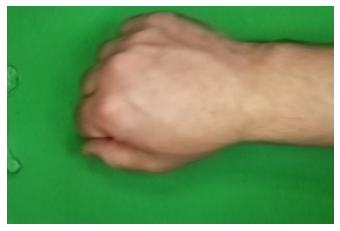

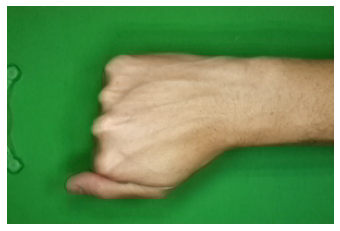

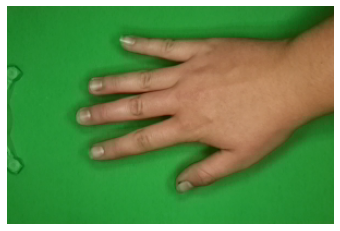

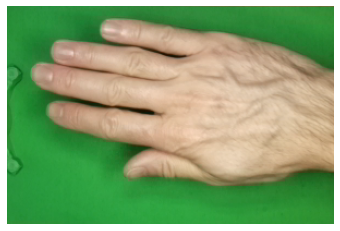

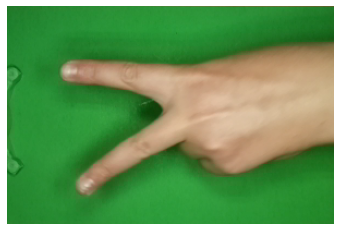

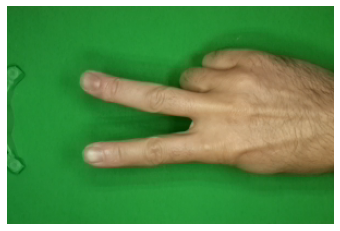

In [10]:
#menampilkan contoh citra yang akan diproses lebih lanjut pada tiap kelas

#import librarly matplot untuk menampilkan gambar pada koordinat kartesius (fungsi axes pada matlab)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#mendeklarasikan base folder pada tiap kelas
rock_files = os.listdir('/tmp/rockpaperscissors/rock')
paper_files = os.listdir('/tmp/rockpaperscissors/paper')
scissors_files = os.listdir('/tmp/rockpaperscissors/scissors')
#mengambil 2 gambar pada tiap kelas
pic_index = 2

next_rock = [os.path.join('/tmp/rockpaperscissors/rock', fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join('/tmp/rockpaperscissors/paper', fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join('/tmp/rockpaperscissors/scissors', fname) 
                for fname in scissors_files[pic_index-2:pic_index]]
#menampilkan hasil gambar yang diambil (2 citra per kelas)
for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [12]:
#melakukan praprocessing pada citra yang akan diproses pada DNN menggunakan ImageData Generator
#augmentasi dan generate image dataset training
train_datagen = ImageDataGenerator(
                    rescale=1./255, #rescaling
                    rotation_range=20, #rotasi
                    horizontal_flip=False, #flip
                    shear_range = 0.2, #shearing
                    fill_mode = 'nearest')
#augmentasi dan generate image dataset validation     
test_datagen = ImageDataGenerator(
                    rescale=1./255, #rescaling
                    rotation_range=20, #rotasi
                    horizontal_flip=False, #flip
                    shear_range = 0.2, #shearing
                    fill_mode = 'nearest')

In [14]:
#memasukkan dataset training hasil praprocessing pada generator dan melakukan klasifikasi 
train_generator = train_datagen.flow_from_directory(
        train_dir, #direktori data training yang berisi 3 kelas, yaitu rock paper dan scissor sesuai dengan porsi split yang diberikan
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical') #model class kategori

#memasukkan dataset validation hasil praprocessing pada generator dan melakukan klasifikasi      
validation_generator = test_datagen.flow_from_directory(
        val_dir, #direktori data validation yang berisi 3 kelas, yaitu rock paper dan scissor sesuai dengan porsi split yang diberikan
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical') #model class kategori

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [15]:
#membuat kumpulan layer konvulasi
model = tf.keras.models.Sequential([
    # Konvulasi Pertama
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Konvulasi Kedua
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Konvulasi Ketiga
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Konvulasi Keempat
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Jadikan hasil layer yang sudah diperoleh dalam sebuah DNN (Deep Neural Network)
    tf.keras.layers.Flatten(),
    # Dropout layer yang berguna untuk mencegah overfitting
    tf.keras.layers.Dropout(0.5),
    # Hidden Layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

#menampilkan output sequential model
model.summary()

#mengcompile kumpulan layer yang sudah dibuat menjadi object dengan fitur training data dan kesimpulan
#menggunakan categorical_crossentropy loss function, rmsprop optimizer dan menangkap hasil metrik dengan variabel accuracy
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [16]:
#callback batas akurasi untuk menghentikan proses training oleh model ketika akurasi mencapai 95%
#untuk mencegah overfitting
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95):
      print('\nAkurasi sudah mencapai 95%')
      self.model.stop_training = True
batas = myCallback()

In [23]:
#melakukan pelatihan model DNN sesuai dengan layer yang sudah dibuat
h_model = model.fit(
      train_generator,
      steps_per_epoch=41, #1312/32 = 41 #perhitungan standar rasio step dalam tiap epoch
      epochs=20,
      validation_data=validation_generator,
      validation_steps=27, #876/32 = 27.3 #perhitungan standar rasio step dalam tiap epoch
      verbose=2,
      callbacks=[batas]) #memanggil fungsi callback

Epoch 1/20
41/41 - 87s - loss: 0.9999 - accuracy: 0.5526 - val_loss: 0.7214 - val_accuracy: 0.7361 - 87s/epoch - 2s/step
Epoch 2/20
41/41 - 79s - loss: 0.4377 - accuracy: 0.8369 - val_loss: 0.3338 - val_accuracy: 0.8623 - 79s/epoch - 2s/step
Epoch 3/20
41/41 - 78s - loss: 0.2397 - accuracy: 0.9230 - val_loss: 0.1531 - val_accuracy: 0.9479 - 78s/epoch - 2s/step
Epoch 4/20
41/41 - 78s - loss: 0.1708 - accuracy: 0.9413 - val_loss: 0.1621 - val_accuracy: 0.9456 - 78s/epoch - 2s/step
Epoch 5/20
41/41 - 78s - loss: 0.1704 - accuracy: 0.9436 - val_loss: 0.1119 - val_accuracy: 0.9641 - 78s/epoch - 2s/step
Epoch 6/20

Akurasi sudah mencapai 95%
41/41 - 79s - loss: 0.1165 - accuracy: 0.9657 - val_loss: 0.1470 - val_accuracy: 0.9560 - 79s/epoch - 2s/step


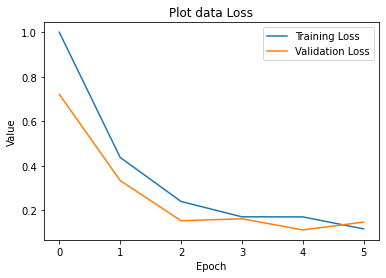

In [24]:
#menampilkan plot data loss untuk melihat tingkat loss data pada proses pelatihan model
#normalnya, tingkat loss akan mengecil pada tiap epochnya
#import library plot dari matplotlib
from matplotlib import pyplot as plt
#loss plot
plt.plot(h_model.history['loss'], label='Training Loss') #mengambil data training loss pada history pelatihan model
plt.plot(h_model.history['val_loss'], label='Validation Loss') #mengambil data validation loss pada history pelatihan model
plt.title('Plot data Loss')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

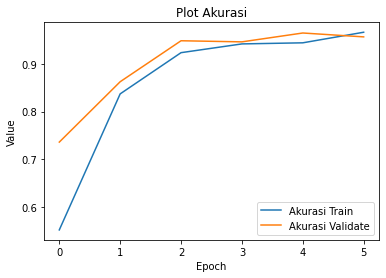

In [25]:
#menampilkan plot tingkat akurasi pada model
#normalnya, tingkat akurasi akan bertambah seiring bertambahnya epoch yang berjalan
#import library plot dari matplotlib
from matplotlib import pyplot as plt
#accuracy train & validation
plt.plot(h_model.history['accuracy'], label='Akurasi Train') #mengambil data training accuracy pada history pelatihan model
plt.plot(h_model.history['val_accuracy'], label='Akurasi Validate') #mengambil data validation accuracy pada history pelatihan model
plt.title('Plot Akurasi')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

Saving 1jKhi65BPTLXnUI6.png to 1jKhi65BPTLXnUI6.png
1jKhi65BPTLXnUI6.png
Gambar tersebut termasuk dalam kelas scissors


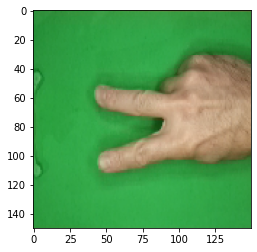

In [46]:
#proses memprediksi gambar menggunakan bantuan fitur file google collab
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#menyimpan file yang diupload pada variabel
uploaded = files.upload()

for fn in uploaded.keys():
  #menampilkan citra yang diupload dalam axes
  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  #memprediksi kelas dari gambar yang diberikan sesuai dengan model yang telah dilatih
  classes = model.predict(images, batch_size=10)
  #urutan Class nya yaitu [Paper, Rock, Scissors] urut sesuai abjad

  #mencetak hasil prediksi
  print(fn)
  if classes[0,0]!=0:
    print('Gambar tersebut termasuk dalam kelas paper')
  elif classes[0,1]!=0:
    print('Gambar tersebut termasuk dalam kelas rock')
  else:
    print('Gambar tersebut termasuk dalam kelas scissors')